In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Mall_Customers.csv")  # Replace with your dataset file path
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [8]:
df.columns = df.columns.str.strip()
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
X = df[['Age', 'Annual Income (k$)']]  # Adjust the column names based on your data
y = df['Spending Score (1-100)']  # Adjust the column names based on your data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling (optional, but good practice for many ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mean Squared Error: 483.55682175408344
R-squared: 0.01963177813218009


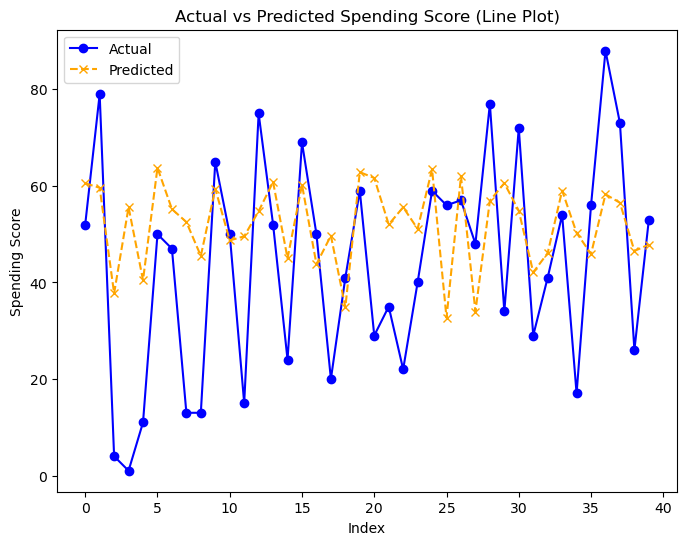

In [12]:
# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test)), y_test, label="Actual", color='blue', marker='o')
plt.plot(np.arange(len(y_test)), y_pred, label="Predicted", color='orange', linestyle='--', marker='x')
plt.title("Actual vs Predicted Spending Score (Line Plot)")
plt.xlabel("Index")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

C:\Users\Keerthan Kumar L V\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Keerthan Kumar L V\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Keerthan Kumar L V\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Keerthan Kumar L V\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Keerthan Kumar L V\anaconda3\Lib\subprocess.py", line

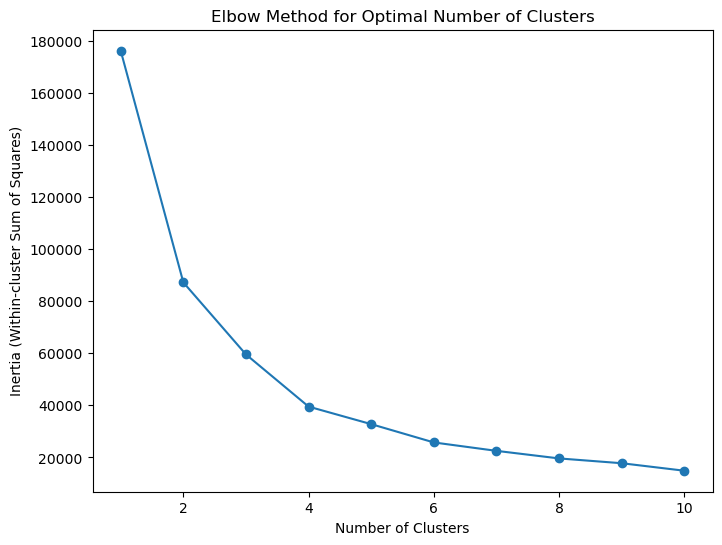

In [14]:
# Import the necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
inertia = []
for i in range(1, 11):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)  # X is the dataset used for clustering (Age, Income, Spending Score)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.show()


Mean Squared Error: 483.55682175408344
R-squared: 0.01963177813218009


C:\Users\Keerthan Kumar L V\AppData\Local\Temp\ipykernel_15560\4164683827.py:46: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Spending Score', shade=True, color='blue')
C:\Users\Keerthan Kumar L V\AppData\Local\Temp\ipykernel_15560\4164683827.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted Spending Score', shade=True, color='red')


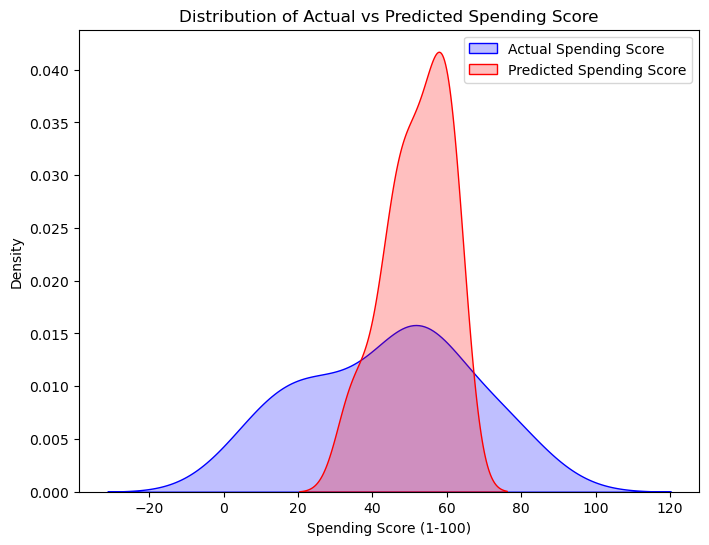

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")  # Replace with your dataset file path

# Clean column names (remove extra spaces, if any)
df.columns = df.columns.str.strip()

# Select features (Age and Annual Income) and target (Spending Score)
X = df[['Age', 'Annual Income (k$)']]  # Features
y = df['Spending Score (1-100)']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance of the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# --- Visualization 3: Distribution Plot (Actual vs Predicted) ---
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Spending Score', shade=True, color='blue')
sns.kdeplot(y_pred, label='Predicted Spending Score', shade=True, color='red')
plt.title("Distribution of Actual vs Predicted Spending Score")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\Keerthan Kumar L V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


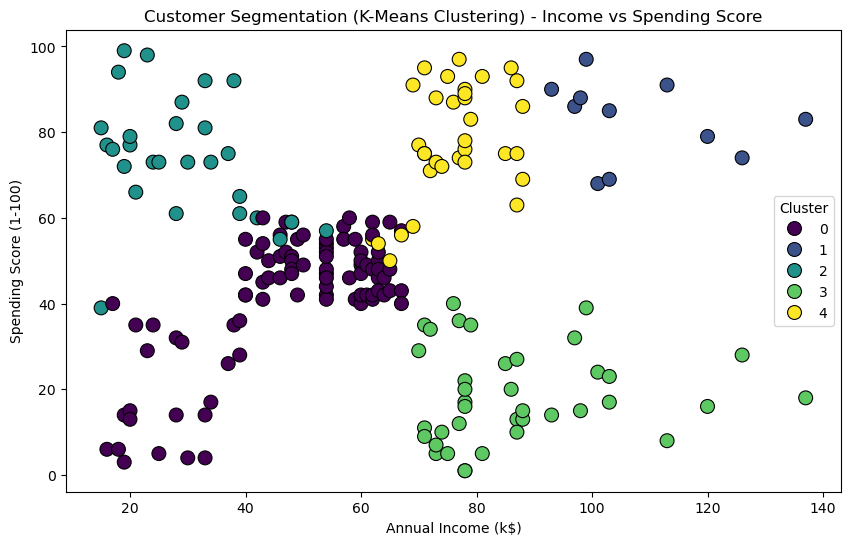

In [19]:
# Import necessary libraries for clustering
from sklearn.cluster import KMeans

# Select features for clustering (Age, Annual Income, Spending Score)
X_cluster = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features for clustering

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters
df['Cluster'] = kmeans.fit_predict(X_cluster)  # Add cluster labels to the dataframe

# Visualizing Clusters: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df, s=100, edgecolor='black')
plt.title("Customer Segmentation (K-Means Clustering) - Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()